In [ ]:
#@title AlexNet

In [ ]:
#@title Connect to google drive 
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import keras
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.utils as image
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization

In [2]:
#@title Preparing The Data
data_dir="C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/train"
data_dir = pathlib.Path(data_dir)

In [3]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5670 files belonging to 3 classes.
Using 4536 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5670 files belonging to 3 classes.
Using 1134 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Overripe', 'Ripe', 'Unripe']


In [6]:
#@title AlexNet Model preparing
# put how many classes in number
num_classes = 3
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(224,224,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(224,224,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(num_classes,activation="softmax"))

In [7]:
epoch=50

my_callbacks = [
    # save logs while training in csv file
    keras.callbacks.CSVLogger('C:/Users/chand/Documents/Github/AlexNet/Logs/log.csv', separator=",", append=False),
    # keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)
    ]

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                        

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
#@title Train your model
history = model.fit(train_ds,validation_data=val_ds,
                    epochs=epoch,
                    callbacks=[my_callbacks],
                    batch_size=32,verbose=1)

Epoch 1/50
142/142 [==============================] - 11s 40ms/step - loss: 1.0440 - accuracy: 0.6276 - val_loss: 8.7663 - val_accuracy: 0.3668
Epoch 2/50
142/142 [==============================] - 5s 35ms/step - loss: 0.7324 - accuracy: 0.6900 - val_loss: 0.7872 - val_accuracy: 0.7134
Epoch 3/50
142/142 [==============================] - 5s 36ms/step - loss: 0.6838 - accuracy: 0.7105 - val_loss: 1.7729 - val_accuracy: 0.5705
Epoch 4/50
142/142 [==============================] - 5s 36ms/step - loss: 0.6063 - accuracy: 0.7370 - val_loss: 0.6748 - val_accuracy: 0.7108
Epoch 5/50
142/142 [==============================] - 5s 38ms/step - loss: 0.5577 - accuracy: 0.7637 - val_loss: 1.2383 - val_accuracy: 0.6085
Epoch 6/50
142/142 [==============================] - 5s 38ms/step - loss: 0.5583 - accuracy: 0.7698 - val_loss: 0.7624 - val_accuracy: 0.7169
Epoch 7/50
142/142 [==============================] - 6s 39ms/step - loss: 0.5170 - accuracy: 0.7886 - val_loss: 1.3006 - val_accuracy: 0.636

In [11]:
#@title save final model
model.save('C:/Users/chand/Documents/Github/AlexNet/Model/AlexNet.h5')

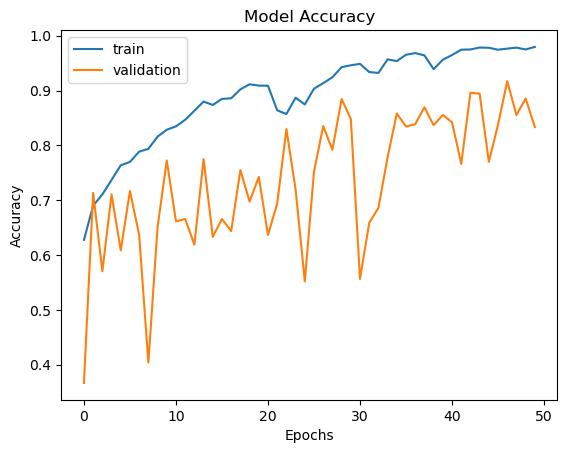

In [12]:
#@title accuracy graph
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

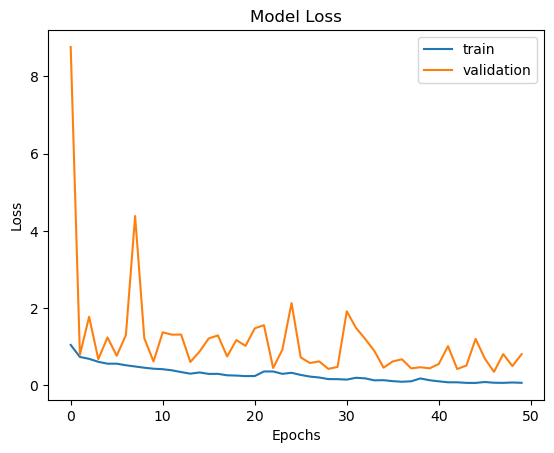

In [13]:
#@title loss graph
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Confusion Matrix

In [3]:
image_generator = keras.preprocessing.image.ImageDataGenerator()
test_data="C:/Users/chand/Documents/Visual_Studio/Project/Classification/Dataset/640A/cashew/test"
test_image_data  = image_generator.flow_from_directory(test_data,target_size=(224,224), batch_size=700)

Found 630 images belonging to 3 classes.


In [4]:
for image_batch, label_batch in test_image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (630, 224, 224, 3)
Label batch shape:  (630, 3)


In [5]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
label_id = np.argmax(label_batch, axis=-1)

20/20 [==============================] - 2s 78ms/step


In [6]:
from sklearn.metrics import classification_report
target_names = ['overripe', 'ripe', 'unripe']
print(classification_report(label_id, predicted_id, zero_division=0, target_names=target_names))

              precision    recall  f1-score   support

    overripe       0.53      0.84      0.65       210
        ripe       0.44      0.25      0.32       210
      unripe       0.91      0.77      0.83       210

    accuracy                           0.62       630
   macro avg       0.63      0.62      0.60       630
weighted avg       0.63      0.62      0.60       630



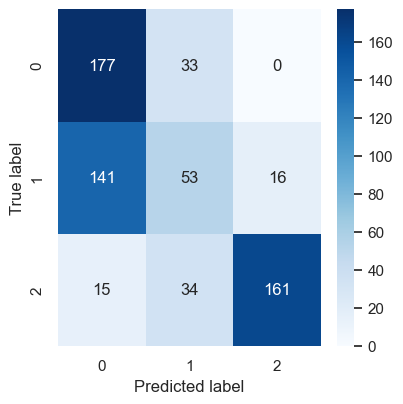

In [7]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

# Compute confusion matrix
con_mat = tf.math.confusion_matrix(labels=label_id, predictions=predicted_id)

# Create the plot
figure = plt.figure(figsize=(4,4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Load model

In [2]:
# Load the trained model
model = load_model("C:/Users/chand/Documents/Github/AlexNet/Model/AlexNet.h5")